# Outline
## I. Introduction
  •	Noise
  •	Definition of basic image filtering
  •	Importance of image filtering
  •	Maths behind image filtering
## II. Basic Filters
  •	Overview of Basic filters
  •	Mean filter
  •	Median filter
  •	Gaussian filter
  •	Bilateral filter
## III. Advance Filters
  •	Non-local means (NLM) denoising filter
  •	What is total variation (TV) denoising
  •	Block Matching and 3D filtering
## IV. Filters for Sharpness, edge detection, tube detection
  •	Definition and importance of unsharp filter
  •	Edge Filters
  •	Ridge filters
 ## V. Transform Domain Filtering
  •	Image filtering using DFT
 ## VI. Conclusion
•	Summary of the basic image filtering methods
•	Importance of using these techniques to enhance the quality of images
•	Importance transform domain






#Noise
Noise is an unfortunate result of data acquisition and it comes in many forms and from many sources. For scientific images (e.g. microscope, MRI, and EBSD),Gaussian noise arises from electronic components including detectors and sensors. In addition, salt & pepper noise may also show up from analog to digital conversion errors. Therefore, image denoising is one of the primary preprocessing operations that a researcher performs before proceeding with extracting information out of these images. Denoising is performed with the help of filters.
#Image Filtering
Filters are very important in signal and image processing. This is one of the mostly used image operation. Filters are used  

*   to remove noise from an image
*   to enhance visual quality of image
* to get a desired result from an image

In order to perform filtering, convolution operation is used in mathematics. the exact same principle isextended to the convolutional neural networks (CNNs), that are become very much popular over the past few years in deep learning tools of AI. The only difference is that while above, a predefined filter coefficent set (kernel) is used, however in CNNs, the values inside the kernel are learned to find a specific feature, or accomplish a specific task.

## Maths Behind the Filtering
In order to carry out an image filtering process, we need a filter, also called a mask. This filter is usually a two-dimensional square window—that is a window with equal dimensions (width and height).

The filter will include numbers. Those numbers are called coefficients, and they are what actually determine the effect of the filter and what the output image will look like.

To apply the filter, the 3x3 window is slid over the image. This process of sliding a filter window over an image is called convolution in the spatial domain. The window will be placed on each pixel (i.e. think of it as a cell in a matrix) in the image, where the center of the filter should overlap that pixel.

Once this overlap happens, the pixels in the sub-image that the filter is on top of will be multiplied by the corresponding coefficients of the filter. In this case, we will have a new matrix with new values similar to the size of the filter (i.e. 3x3). Finally, the central pixel value will be replaced by a new value using a specific mathematical equation depending on the type of filter used (i.e. median filter).

# Basic Image Filters
Basic filters used for image processing are
* Averaging Filter
* Median Filter
* Gaussian Filter


In [2]:
#loading All dependencies
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import color
from PIL import Image
import matplotlib.pylab as plt
#Mounting Google Drive to read files
#from google.colab import drive
#drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
bright_square = np.zeros((7, 7), dtype=float)
bright_square[2:5, 2:5] = 1

This gives the values below:

In [4]:
print(bright_square)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


and looks like a white square centered on a black square:

(-0.5, 6.5, 6.5, -0.5)

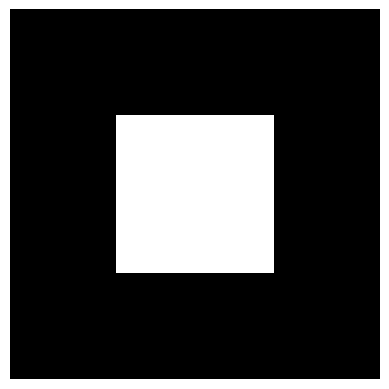

In [5]:
fig, ax = plt.subplots()
ax.imshow(bright_square,cmap='gray');
plt.axis('off')

## Add Noise to an image


Text(0.5, 1.0, 'Image with added noise')

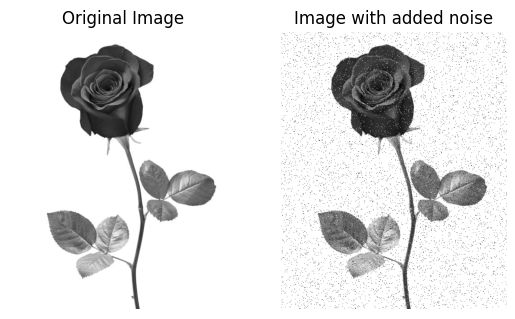

In [19]:
import random
def add_noise(img):

    # Getting the dimensions of the image
    row , col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img

# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/rose.jpg', cv.IMREAD_GRAYSCALE)
fig,(ax0,ax1) = plt.subplots(1,2)
ax0.imshow(img,cmap='gray');
ax0.axis('off')
ax0.set_title('Original Image')

img_n=add_noise(img)
ax1.imshow(img_n,cmap='gray');
ax1.axis('off')
ax1.set_title('Image with added noise')

## The Mean Filter or Averaging filter
It is also known as the smoothing filter. It removes the high-frequency content from the image. It is also used to blur an image.



For our first example of a filter, consider the following filtering array, which we’ll call a “mean kernel”. For each pixel, a kernel defines which neighboring pixels to consider when filtering, and how much to weight those pixels.

In [ ]:
mean_kernel = np.full((3, 3), 1/9)
print(mean_kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Now, let’s take our mean kernel and apply it to every pixel of the image.Applying a (linear) filter essentially means:  Center a kernel on a pixel will Multiply the pixels under that kernel by the values in the kernel Sum all the those results Replace the center pixel with the summed result. This process is known as convolution. Let’s take a look at the numerical result.

In [ ]:
import scipy.ndimage as ndi
#precision 2
print(bright_square)
print(ndi.convolve(bright_square, mean_kernel)) # convolution for filter

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.22222222 0.11111111
  0.        ]
 [0.         0.22222222 0.44444444 0.66666667 0.44444444 0.22222222
  0.        ]
 [0.         0.33333333 0.66666667 1.         0.66666667 0.33333333
  0.        ]
 [0.         0.22222222 0.44444444 0.66666667 0.44444444 0.22222222
  0.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.22222222 0.11111111
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


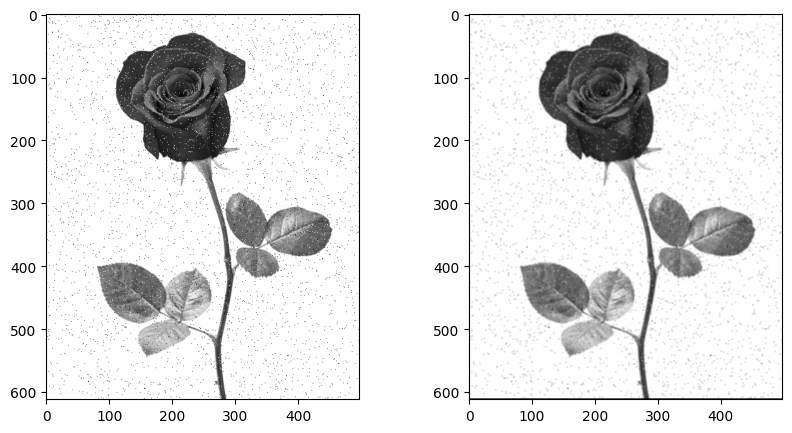

In [ ]:
# Low Pass SPatial Domain Filtering using convolution
# to observe the blurring effect

# Read the image
img = img_n

# Obtain number of rows and columns
# of the image
m, n = img.shape

# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]

		img_new[i, j]= temp

img_new = img_new.astype(np.uint8)
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(10, 5))
ax0.imshow(img,cmap='gray');
ax1.imshow(img_new,cmap='gray');
#cv2.imwrite('blurred.tif', img_new)


Now let us see effect of mean filter on an undersampled or pixalated image

(612, 498, 3)


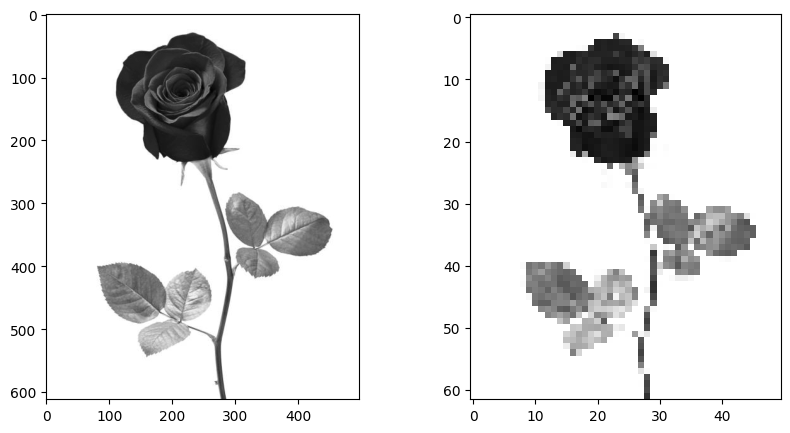

In [ ]:
# Cameraman from skiimage
#from skimage import data
#img = data.camera()
#Read local image
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/rose.jpg')
print(img.shape)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = color.rgb2gray(img)
pixelated = img[::10, ::10]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(img,cmap='gray')
ax1.imshow(pixelated,cmap='gray') ;

Here we use a step of 10, giving us every tenth column and every tenth row of the original image. You can see the highly pixelated result on the right.

We are actually going to be using the pattern of plotting multiple images side by side quite often, so we are going to make the following helper function:

In [ ]:
from skimage import img_as_float

def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax,cmap='gray')
        ax.set_title(label)

# Mean filter on a real image
Now we can apply the filter to this downsampled (pixelated) image


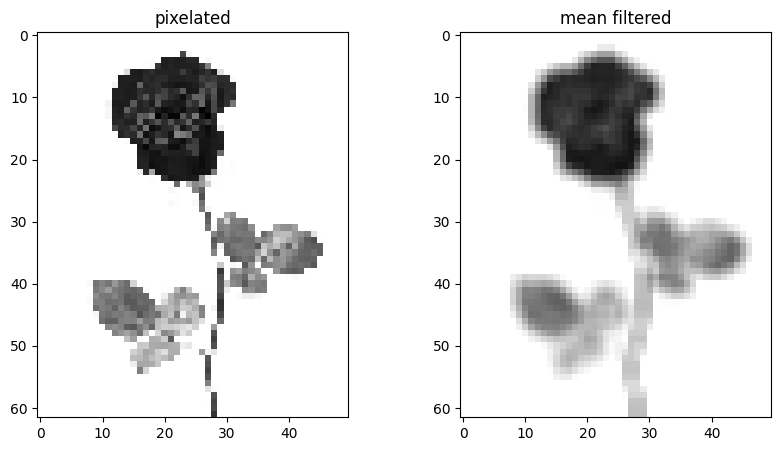

In [ ]:
filtered = ndi.convolve(pixelated, mean_kernel)
imshow_all(pixelated, filtered, titles=['pixelated', 'mean filtered'])

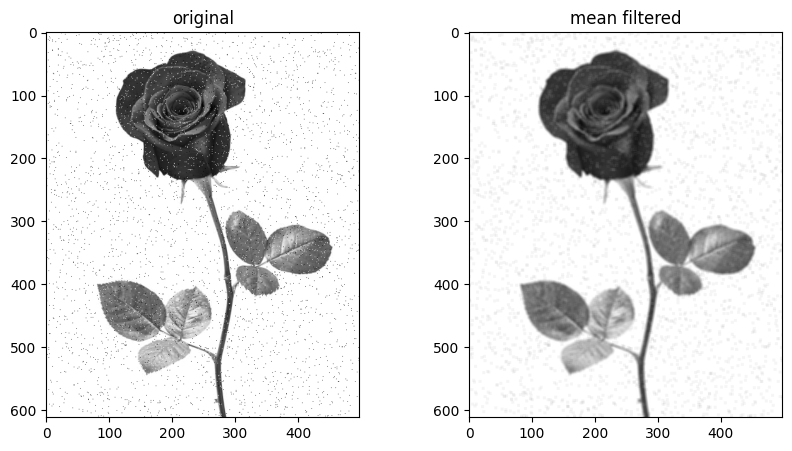

In [ ]:
img_O = img_n #cv.imread('/content/drive/MyDrive/Colab Notebooks/rose.jpg')
img = cv.cvtColor(img_O, cv.COLOR_BGR2RGB);
img = color.rgb2gray(img);
img_mean = cv.blur(img_O,(5,5)) # Add median filter to image
img_m = cv.cvtColor(img_mean, cv.COLOR_BGR2RGB);
img_m = color.rgb2gray(img_m);
imshow_all(img, img_m,titles=['original', 'mean filtered']) # Display img with median filter

## Median Filter
Median Filter is also used for smoothing. Its basic idea is to replace each pixel by the median of its neigboring pixels.
By doing so, it removes some spikes introduced by noise: especially impulse and salt & pepper noise. This is because stand-alone noise pixels with extreme intensities like black and white cannot survive after median filtering. Another advantage of median filter is that it does not introduce new pixel values since it only re-use exisiting pixel values from window. Further, unlike other averaging filters, it remove noise without losing edge information as is illustrated below.
https://miro.medium.com/v2/resize:fit:640/format:webp/1*1Hm8TiGAcVaDh1thjE3nzg.png

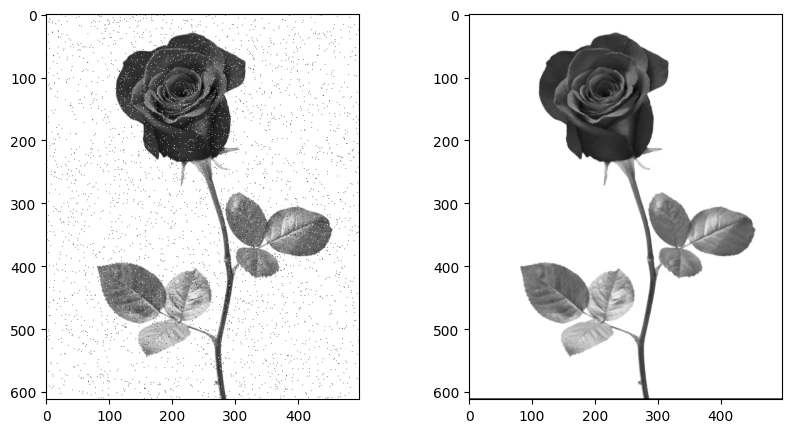

In [ ]:
# Median Spatial Domain Filtering
# Read the image
img_noisy1 = img_O

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]

		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(10, 5))
ax0.imshow(img_O,cmap='gray');
ax1.imshow(img_new1,cmap='gray');


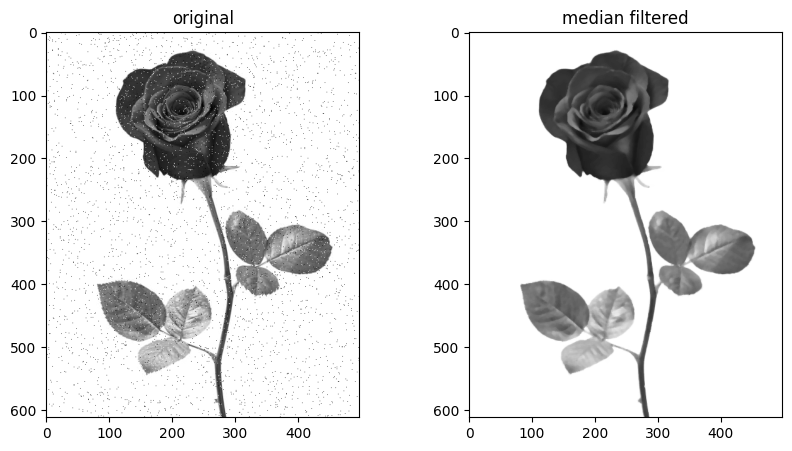

In [ ]:
#Median Filter by using in built function of open CV

img_O = img_n #cv.imread('/content/drive/MyDrive/Colab Notebooks/rose.jpg')
img = cv.cvtColor(img_O, cv.COLOR_BGR2RGB);
img = color.rgb2gray(img);
img_median = cv.medianBlur(img_O, 5) # Add median filter to image
img_m = cv.cvtColor(img_median, cv.COLOR_BGR2RGB);
img_m = color.rgb2gray(img_m);
imshow_all(img, img_m,titles=['original', 'median filtered']) # Display img with median filter

## Gaussian Filter
Probably the most useful filter (although not the fastest). Gaussian filtering is done by convolving each point in the input array with a Gaussian kernel and then summing them all to produce the output array.
Just to make the picture clearer, remember how a 1D Gaussian kernel look like?

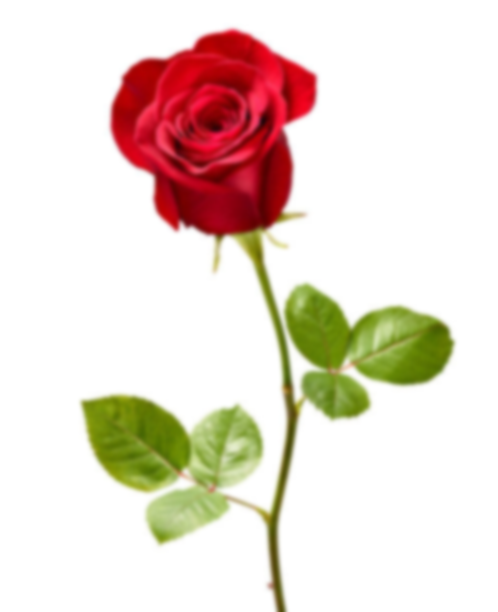

In [ ]:
# Using PIL
# ImageFilter for using filter() function
from PIL import Image, ImageFilter

# Opening the image
# (R prefixed to string in order to deal with '\' in paths)
image = Image.open(r"/content/drive/MyDrive/Colab Notebooks/rose.jpg")
# Blurring image by sending the ImageFilter.
# GaussianBlur predefined kernel argument
image = image.filter(ImageFilter.GaussianBlur)
# Displaying the image
image.show()


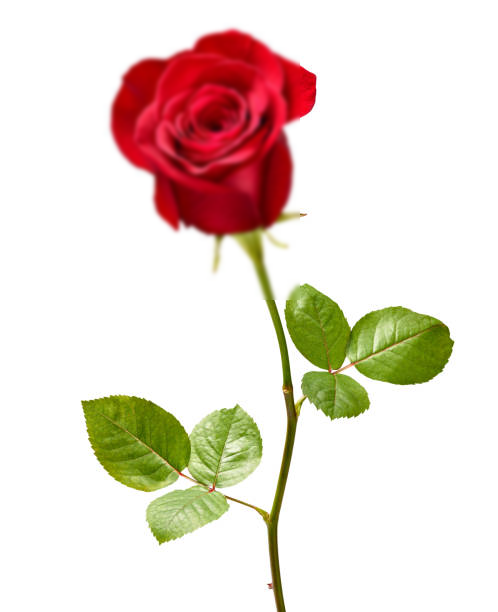

In [ ]:
from PIL import Image, ImageFilter

image = Image.open(r"/content/drive/MyDrive/Colab Notebooks/rose.jpg")

# Cropping the image
smol_image = image.crop((0, 0, 300, 300))

# Blurring on the cropped image
blurred_image = smol_image.filter(ImageFilter.GaussianBlur)

# Pasting the blurred image on the original image
image.paste(blurred_image, (0,0))

# Displaying the image
image.show()
# image.save('output.png')


## References
1.
https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html
2.
https://github.com/m4nv1r/medium_articles/blob/master/Image_Filters_in_Python.ipynb
3.
https://code.tutsplus.com/tutorials/image-filtering-in-python--cms-29202
4. https://thecleverprogrammer.com/2020/07/25/image-filtering-with-machine-learning/

5.
https://youtu.be/Fdhn5_gT1wY

In [ ]:
# Read images from urls
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

In [ ]:
#read image from google drive
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/rose.jpg')
print(img.shape)
img_2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#final_img = cv.hconcat((img, img_2))
cv2_imshow(img)
cv.imwrite('save_img.png',img_2)